In [2]:
import os
import mnist
import pickle
import cv2
from skimage.color import rgb2gray,rgba2rgb
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage.transform import resize
from skimage.feature import hog,SIFT,local_binary_pattern
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

c:\Users\karim\anaconda3\envs\image\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def binary_threshold(image,threshold):
    thresh = np.zeros_like(image)
    thresh[image >= threshold] = 255
    thresh[image < threshold] = 0
    return thresh

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

def getThreshold(image):
    hist = np.zeros(256)
    for i in range(len(hist)):
        hist[i] = np.sum(image == i)
    
    Thist = 0

    for i in range(len(hist)):
        Thist += i * hist[i]
    Thist = round(Thist / (image.shape[0] * image.shape[1]))
    Tnew = 0
    Told = Thist
    c = 0
    # print(Told)
    while (Tnew != Told):
        if c > 0:
            Told = Tnew
        else:
            c += 1
        Tlow = 0 
        Thigh = 0
        for i in range(0, Told):
            Tlow += i * hist[i]
        sumLow = np.sum(hist[0:Told])
        
        Tlow = round(Tlow / sumLow) if not math.isnan(Tlow / sumLow) else 255
        for i in range(Told, 256):
            Thigh += i * hist[i]
        sumHigh = np.sum(hist[Told:])
        Thigh = round(Thigh / sumHigh) if not math.isnan(Thigh / sumHigh) else 255

        Tnew = round((Tlow + Thigh) / 2) 
    
    return Tnew
    
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

def convert2Gray(images):
    for i in range(len(images)):
        dimensions = images[i].shape
        if dimensions[2] == 3:  # rgb image
            images[i] = rgb2gray(images[i])
        else:  # rgba image
            images[i] = rgba2rgb(images[i])
            images[i] = rgb2gray(images[i])
    
    return images

def threshold_images(images):
    for i in range(len(images)):
        temp = getThreshold(images[i])
        images[i] = binary_threshold(images[i],temp)
    
    return images

def setTo255(images):
    for i in range(len(images)):
        images[i] = (images[i] * 255).astype(np.uint8)
    
    return images

def resize_images(images,size):
    for i in range(len(images)):
        images[i] = resize(images[i], size)
        images[i] = (images[i] * 255).astype(np.uint8)
    return images

def Extract_Hog(images):
    X_train = []
    hog_images = []

    for i in range(len(images)):
        fd,im = hog(images[i], orientations=8, pixels_per_cell=(2,2),cells_per_block=(4,4),visualize=True)
        X_train.append(fd)
        hog_images.append(im)
    
    return X_train,hog_images

def Extract_SIFT(images):
    X_train = []
    descriptor_extractor = SIFT()
    for i in range(len(images)):
        descriptor_extractor.detect_and_extract(images[i])
        descriptors1 = descriptor_extractor.descriptors
        X_train.append(descriptors1.flatten())
    
    return X_train

def Extract_lbp(images):
    X_train = []
    descriptor_extractor = SIFT()
    for i in range(len(images)):
        lbp = local_binary_pattern(images[i], 3, 1)
        X_train.append(lbp.flatten())
    
    return X_train


def fit_classifier(classifier,X_train,Y_train):
    classifier.fit(X_train,Y_train)
    return classifier
    
def Process_folder(folder,size): # foldername,size of resize
    images = load_images_from_folder(folder)
    images = convert2Gray(images)
    images = resize_images(images,size)
    images = threshold_images(images)
    features,ay = Extract_Hog(images)
    #features = Extract_lbp(images)
    return features

def create_Y(char,num):
    y_train = [] 
    for i in range(num):
        y_train.append(char)
    return y_train

In [ ]:
X_train = Process_folder("one dataset",(128,64))
y_train = create_Y("1",len(X_train))

x_2 = Process_folder("two dataset",(128,64))
y_2 = create_Y("2",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("three dataset",(128,64))
y_2 = create_Y("3",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("four dataset",(128,64))
y_2 = create_Y("4",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("five dataset",(128,64))
y_2 = create_Y("5",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("six dataset",(128,64))
y_2 = create_Y("6",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("seven dataset",(128,64))
y_2 = create_Y("7",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("eight dataset",(128,64))
y_2 = create_Y("8",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("nine dataset",(128,64))
y_2 = create_Y("9",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("zero dataset",(128,64))
y_2 = create_Y("0",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("X dataset",(128,64))
y_2 = create_Y("x",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("checkmark dataset",(128,64))
y_2 = create_Y("check",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("question mark dataset",(128,64))
y_2 = create_Y("?",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("mius dataset",(128,64))
y_2 = create_Y("_",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("V1",(128,64))
y_2 = create_Y("V1",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("V2",(128,64))
y_2 = create_Y("V2",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("V3",(128,64))
y_2 = create_Y("V3",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("V4",(128,64))
y_2 = create_Y("V4",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("V5",(128,64))
y_2 = create_Y("V5",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("H1",(128,64))
y_2 = create_Y("H1",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("H2",(128,64))
y_2 = create_Y("H2",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("H3",(128,64))
y_2 = create_Y("H3",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("H4",(128,64))
y_2 = create_Y("H4",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("H5",(128,64))
y_2 = create_Y("H5",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("Empty",(128,64))
y_2 = create_Y("empty",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
# save the model to disk
filename = 'All_hog_rf.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
model = SVC()
model.fit(X_train, y_train)
# save the model to disk
filename = 'All_hog_svm.sav'
pickle.dump(model, open(filename, 'wb'))

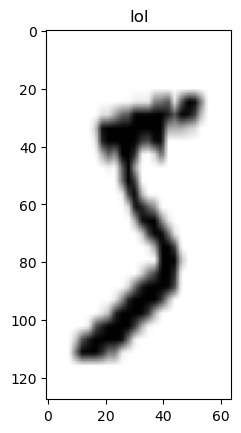

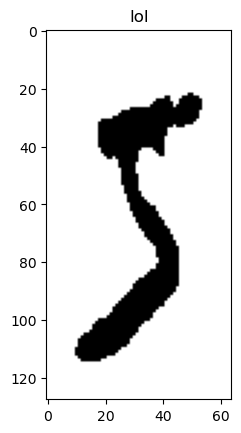

In [3]:
# mnist training

train_images = mnist.train_images()
train_labels = mnist.train_labels()

images = 255 - train_images[:1000]
temp = []

for i in range(len(images)):
    img = resize(images[i],(128,64))
    img = (img * 255).astype(np.uint8)
    temp.append(img)

images = temp

show_images([images[0]],["lol"])

images = threshold_images(images)
show_images([images[0]],["lol"])

X_train,ay = Extract_Hog(images)
y_train = train_labels[:1000]

In [5]:
y_train = train_labels[:1000]
model = RandomForestClassifier()
model.fit(X_train, y_train)
# save the model to disk
filename = 'RF_2X2_1000.sav'
pickle.dump(model, open(filename, 'wb'))

In [4]:
y_train = train_labels[:1000]
model = SVC()
model.fit(X_train, y_train)
# save the model to disk
filename = 'SVC_2X2_1000.sav'
pickle.dump(model, open(filename, 'wb'))

In [4]:
X_train = Process_folder("one dataset",(128,64))
y_train = create_Y("1",len(X_train))

x_2 = Process_folder("two dataset",(128,64))
y_2 = create_Y("2",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("three dataset",(128,64))
y_2 = create_Y("3",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("four dataset",(128,64))
y_2 = create_Y("4",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("five dataset",(128,64))
y_2 = create_Y("5",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("six dataset",(128,64))
y_2 = create_Y("6",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("seven dataset",(128,64))
y_2 = create_Y("7",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("eight dataset",(128,64))
y_2 = create_Y("8",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("nine dataset",(128,64))
y_2 = create_Y("9",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

x_2 = Process_folder("zero dataset",(128,64))
y_2 = create_Y("0",len(x_2))

X_train = X_train + x_2
y_train = y_train + y_2

In [5]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
# save the model to disk
filename = 'our_numbers_rf.sav'
pickle.dump(model, open(filename, 'wb'))

model = SVC()
model.fit(X_train, y_train)
# save the model to disk
filename = 'our_numbers_svm.sav'
pickle.dump(model, open(filename, 'wb'))
